# ANN (Artificial Neural Networks: Redes Neuronales Artificiales)

* Las ANN son algoritmos de los mas útiles en ML.
* Son aproximadores universales. Asi como con senos y cosenos y series de Fourier usted puede aproximar casi cualquier funcion tanto como quiera, de la misma forma las redes neuronlaes con funciones de activacion (sigmoid, ReLU, etc) pueden hacer lo mismo. La primera prueba de este teorema la hizi Cybenko (1989), con una sola capa oculta, luego este teorema se extendio a varias capas ocultas y otras funciones de activacion (Hornik y  amigos, referencia en las notas de clase).

* En esta clase vamos a estudiar la Backpropagation (propagacion hacia atrás).
[Usamos ideas de Nielsen](http://neuralnetworksanddeeplearning.com/).

Por que otra vez backpropagation cuando esto lo vimos en el curso de ML.
La diferencia es que acá es para cualquier función de costo y caulquier función de activación. Allá era para una función de costo logística (cross-entropy) y función de activación logística.

En general la función de costo  es de la forma

$$C(\Theta) = \frac1m \sum_{i=1}^m C_i(\Theta).  $$
donde $C_i(\theta)$ es la función de costo sobre la muestra $x_i$.
Queremos es hallar $\nabla C(\Theta)$. Necesitamos las derivadas parciales

$$\frac{\partial C_i(\Theta)}{\partial \theta_{kj}^{\ell}} $$
Aca $\Theta$ es un tensor de rango 3. $k$ es el índice del nodo de salida de la capa $\ell$, $j$ es el nodo de entrada. El índice $i$ es la muestra $x_i$.
Esto es un tensor de rango 4.
Ahora bien, $\ell=1,2, \cdots, L$. Tenemos $L+1$ capas (contando la entrada) $L-1$ ocultas.

Vamos a tratar de simplificar el calculo del gradiente. Primero, quitemos el indice $i$ y pensemos que estamos en una muestra genérica $x$, en vez de $x_i$. Igual al final, toca sumar todas las contribuciones de las muestras. Pero el cambiar $x_i$ por $x$ no cambia ninguno de los cálculos en el gradiente. Pues el gradiente es lineal y el gradiente de la suma es la suma de los gradientes.
Mas, bien pensamos en

$$\frac{\partial C(\theta)}{\partial \theta_{kj}^{\ell}} $$

Como hace la propagación hacia atrás.

* Primero se hace la propagación hacia adelante hasta la capa de salida.
* Nos devolvemos desde la última capa $L$ hasta la capa 1. Hallando el gradiente y actualizando los pesos.

$$\theta^{(i+1)} = \theta^{(i)} - \eta \nabla J(\theta^{(i)}) $$

Para estas derivadas usamos la **regla de la cadena**.

Es decir

$$\frac{\partial C}{\partial \theta_{kj}^{\ell}} = \frac{\partial C}{\partial z_j^{\ell}}  \frac{\partial z_j^{\ell}}{\theta_{kj}^\ell} \tag{1} $$
$z_j^{\ell}$ es una funcion lineal en $\theta$ con coeficientes las activaciones en la capa anterior (ver clase ML).

Es decir

$$z_j^\ell = \sum_p a_p^{\ell-1} \theta_{pj}^\ell \tag{2} $$
La derivada de $z_j^\ell$ es fácil por que es una funcion lineal. La derivada dificil es la $\partial C/\partial z_j^\ell$.
$p=1,2, \cdots, n_p$ donde $n_p$ es el numero de nodos de salida.
Pero evitar muchos simbolos vamos a omitir los índices de la suma.

Concentremonos en este momento en la fácil.

Usando la formula (2)
$$\frac{\partial z_j^{\ell}}{\partial  \theta_{kj}^\ell}
 = \sum_p \frac{\partial \theta_{pj}^\ell}{\partial \theta_{kj}^\ell} a_p^{\ell-1}  = \sum_p  \delta_{pk}  a_p^{\ell-1} = a_k^{\ell-1} \tag{2a}$$

 Nos concentrmos ahora en el primer factor de la Ecuación (1). Es decir

 $$d_j^\ell = \frac{\partial C}{\partial z_j^\ell} $$

 Usamos la regla de la cadena una vez más.
 Estamos parados en la última capa $L$

 $$C(\Theta) = C( a^L(z^L)) $$
 $\theta$ esta relacionado con $z$ a traves de la hipotesis
 $$h(\Theta, X) = C(a^L(\Theta, X)) $$

$$d_j^{L} = \frac{\partial C}{\partial a_j^L} \frac{\partial a_j^L}{\partial z_j^L} $$

La activación es una función $f$ de forma que

$$a_j^L = f(z_j^L) $$
En el curso de ML , $f$ era la logistica sigmoide.
Entonces

$$d_j^L = \frac{\partial C}{\partial a_j^L} f´(z_j^L) $$

Escribimos el resultado en la última capa, de forma vectorial

$$d^L = \nabla_{a^L} C \circ f´(z^L) $$


Estamos en la capa $L$ y nos tenemos que devolver.  Como calculamos $d_j^\ell$?
un $z$ en una capa posterior depende de los $z$ en la capa anterior. Enseguida mostramos esa dependencia. Es decir

$$z_j^{\ell+1} = g(z_1^\ell, z_2^\ell, \cdots z_n^\ell) $$

La regla de la cadena aca (por tercera vez)
Recuerde que los $C$ dependen de los $z$ en la capa $\ell+1$ que a su vez dependen indirectamente de los $z$ en la capa $\ell$.

\begin{eqnarray} d_j^\ell &=& \frac{\partial C}{\partial z_j^\ell} \\
&=& \sum_k \frac{\partial C }{\partial z_k^{\ell+1}}
\frac{\partial z_k^{\ell+1}}{\partial z_j^\ell} \\
&=& \sum_k d_k^{\ell+1} \frac{\partial z_k^{\ell+1}}{\partial z_j^\ell} \tag{3}  .
\end{eqnarray}
Les voy a mostrar como $z$ en la capa $\ell+1$ está relacionado con $z$ en la capa $\ell$

$$z_k^{\ell+1} = \sum_p a_p^\ell \theta_{pk}^{\ell+1} = \sum_p \theta_{pk}^{\ell+1} f(z_p^\ell) $$
Sacamos la derivada de esta ecuación

$$\frac{\partial z^{\ell+1}}{\partial z_j^\ell} = \sum_p  \theta_{pk}^\ell  f´(z_p^\ell) \frac{\partial z_p^\ell}{\partial z_j^\ell}  = \sum_p \theta_{pk}^\ell f´(z_p^\ell) \delta_{pj} = \theta_{jk}^\ell f´(z_p^\ell). $$

Insertamos este reultado en la Ecuación (3) y entontramos

$$d_j^\ell = \sum_k d_k^{\ell+1} \theta_{jk}^{\ell+1} f´(z_j^\ell) $$

Quitamos el índice $j$ para usar la definición de producto Hadamard y observamos el producto de matrices en la suma

$$d^{\ell} = \Theta^{\ell+1} d^{\ell+1} \circ f´(z^\ell) $$

El algoritmo se muestra a continuacion.

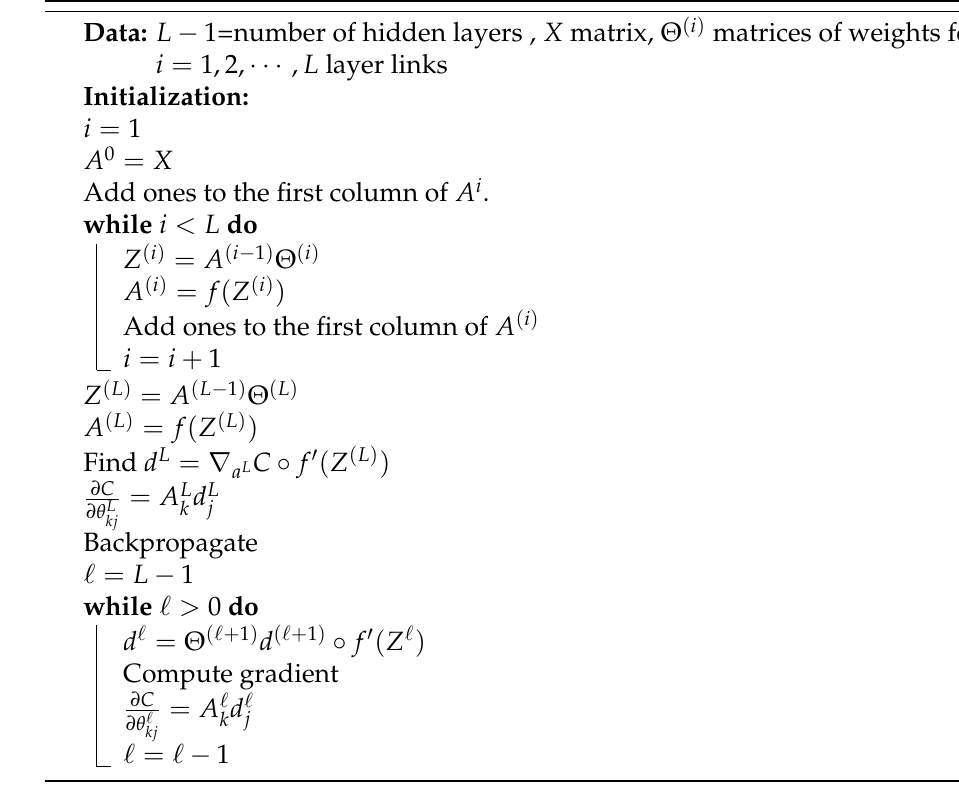

# Desarrollo de un modelo ( predictivo).
Para desarrollar un modelo se necesitan los siguientes pasos:

* Adquisición de datos
* pre-procesamiento de datos
* construcción de la arquitectura del modelo
* entrenamiento del modelo para obtener los parámetros
* hacer predicciones

## Adquisición de datos.
*  [Wikipedia](https://en.wikipedia.org/wiki/List_of_datasets_for_machine-learning_research) tiene direcciones a una cantidad de repositorios con datos para ML.

* [Papers with code](https://huggingface.co/papers/trending) presenta una colección de articulos con datos para ML.

* [ImageNet](https://image-net.org/) presenta una cantidad de imágenes superior a los 14 millones que se usan para concursos y probar algoritmos de ML (Fei-Fei).

* [Flower Data set](https://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html) tiene 102 catgorías de flores. Para entrenar algoritmos de ML.

* [MNIST](http://yann.lecun.com/exdb/mnist/)
son datos con los digitos del 0 a 9 escritos a mano por mas de 90 personas entre estudiantes de High school y empleados de la oficina postal de los Estados Unidos.

* [CIFAR-10, CIFAR-100](https://www.cs.toronto.edu/~kriz/cifar.html) tiene mas 80 millones de imágenes pequeñitas. Es de la universidad de Toronto: Alex Krizhevsky (el del AlexNet), Geoffrey Hinton y Vinod Nair.

* [Princeton ModelNet Project](https://modelnet.cs.princeton.edu/). Una coleccion de CAD (Computer Aided Design) modelos.

* [unplash.com](https://unsplash.com/) tiene mas de 2 millones de fotografías que son de libre uso.

* La internet esta llena de datos para cualquier clase de proyectos. Si son de lengua esta todo Wikipedia (y miles de novelas y libros de litatura cargados de datos valiosos). Si es video (YouTube y otros).

* En muchos proyectos los datos se adquieren como parte del proyecto y no están disponibles en la internet.

8:02


## Preprocesamiento de datos.
Hay varios pasos que son de importancia en el pre-procesamiento de datos.


* **Homogenización**. Asuma, por ejemplo, que se tiene un conjunto grande de imágenes. Las imágenes tienen distintos tamaños. Por ejemplo $100 \times 100$, $1000 \times1000$, etc. Es más fácil, por manejo de memoria y logística computacional, tener todas las imágnes del mismo tamaño. Entonces toca hacer "crop".

* **Normalización**: En ML estudiamos **feature normalization**, pero la normalización va mas allá. Por ejemplo en el MNIST vamos a normalizar para que los datos queden en el intervalo $[0,1]$.

* **eliminación de ruido**: Ruido es muchas cosas:
    * mala resolución de imágenes.
    * imagen cuya información no aporte al proyecto.
    * NaN (Not a number). NONE.
    * Formateo. Por ejemplo en `Python`, se pude trabar muy bien con datos ajustados a `Pandas`.


## Construcción de la Arquitectura.
Supongamos redes neuronales

* Número de capas.
* Número de nodos por capa.
* Funciones de activación.
* Función de costo.
* Técnicas de optimmización. Gradiente: Batch, Minibatch, Stochastc? aceleradores: momentum, Nesterov, AdaGrad, Adam, RMSprop.
* Densamente conectada?  (MLP) o no? como CNN (este curso).
* El tipo de redes: Recurrentes (RNN), GAN: Generative Adversarial Networks (dos turnándose), etc.

Todos estos son **hiperparámetros**. Los parámetros son $\Theta$.

[playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=spiral&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=5,3,2,2&seed=0.25420&showTestData=false&discretize=false&percTrainData=50&x=true&y=false&xTimesY=false&xSquared=true&ySquared=true&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)  es una aplicación (TensorFlow) para simular una red neuronal que resuele problemas de clasificación y regresión. Parte de la próxima tarea está en usar esta aplicacion (toy).


* Número de épocas.     
* Radio entre muestras de prueba y muestras de entrenamiento.

## Entrenamiento del modelo.
Ya la architectura está definida. Simplemente es tocar el boton "play".

## Predicciones (modelo predictivo)
Toca analizar el precisión con que el modelo creado funciona. Si es buena listo. Si no, podemos hacer ciclos. El ciclo más grande es volver a los datos,

# Deep Learning (DL) (aprendizaje profundo)
## Introducción.


Algo importante en DL es la visualización de las arquitecturas.
En la red hay buenas herramientas para visualizar la arquitectura.

Por ejemplo Alex Lenail desarrolló una interfaz para diseñar arquitecturas tipo MLP (Multi-layer Perceptron).

[NN-SVG](https://alexlenail.me/NN-SVG/).

La representación al estilo de un MLP no es conveniente para DL. Está la representación al estilo de **AlexNet**.

La siguiente Figura muestra el AlexNet, la cual describimos en detalle en la próxima clase.



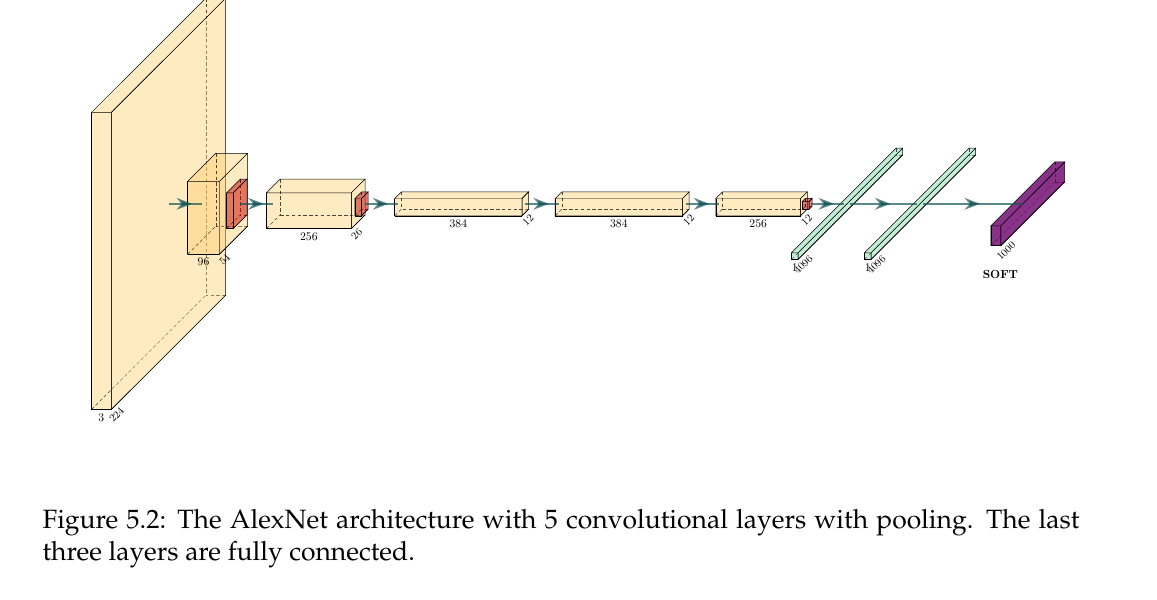

[PlotNeuralNet](https://github.com/HarisIqbal88/PlotNeuralNet) le permite hacer gráficos como el de la Figura 5.2. (de hecho ese lo hice con ese software).

## Convolutional Neural Networks (CNN o ConvNets).

* Estas fueron inicialmente desarrolladas por el Japonés
Kunihiko Fukushima en 1980.

* Entre los 1980s y 1990s, Yann LeCun desarrolló los primeros experimentos prácticos donde se usan las CNN. La red se llama las LeNet (LeCun Net). Estudiaremos en detalle la LeNet 5

El diseño básico de una CNN se muestra en la Figura 5.3.

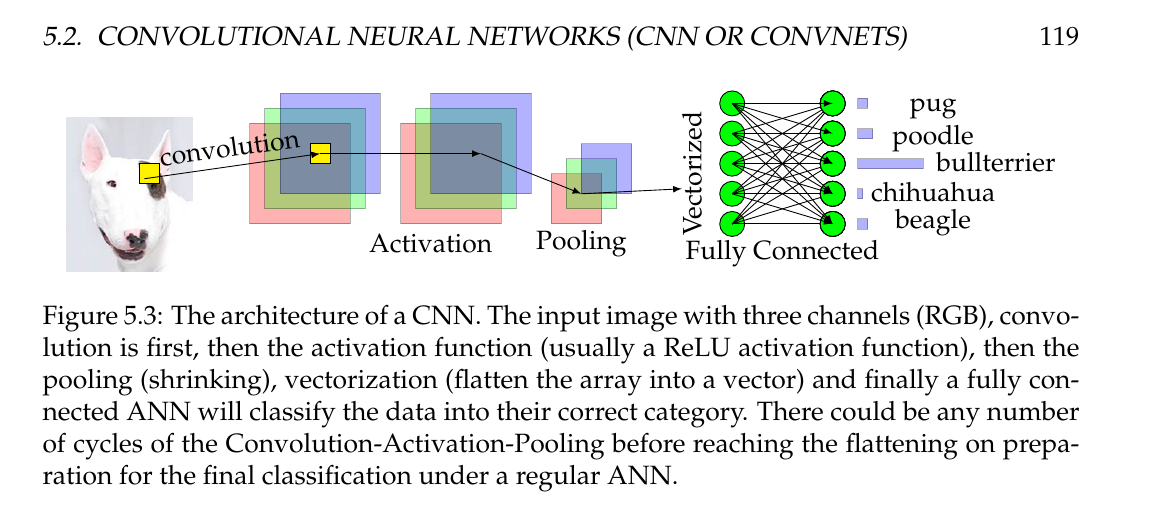

Las CNN tienen 2 ventajas claras.

1. Reducen mucho el volumen de datos y cálculos, como lo vamos a ver.
2. Usan correlación que es importante para extraer características de las imágenes.

El punto 1 lo analizamos más tarde. Con respecto al punto 2 piense en el siguiente filtro (kernel).


$$\begin{pmatrix}
0 & 0 & 0 \\
1 & 1 & 1 \\
0 & 0 & 0 \\
\end{pmatrix} $$

$$
\sum
\begin{pmatrix}
0 & 0 & 0 \\
1 & 1 & 1 \\
0 & 0 & 0 \\
\end{pmatrix}
\circ
\begin{pmatrix}
a & b & c \\
d & e & f \\
i & h & d \\
\end{pmatrix}
= 0a +0b + 0c + 1d+1e+1f + 0 i + 0h + 0h$$

Este tipo de filtro o kernel extra información que está en lineas horiontales.

De igual forma
$$
\begin{pmatrix}
0 & 1 & 0 \\
0 & 1 & 0 \\
0 & 1 & 0 \\
\end{pmatrix}
$$


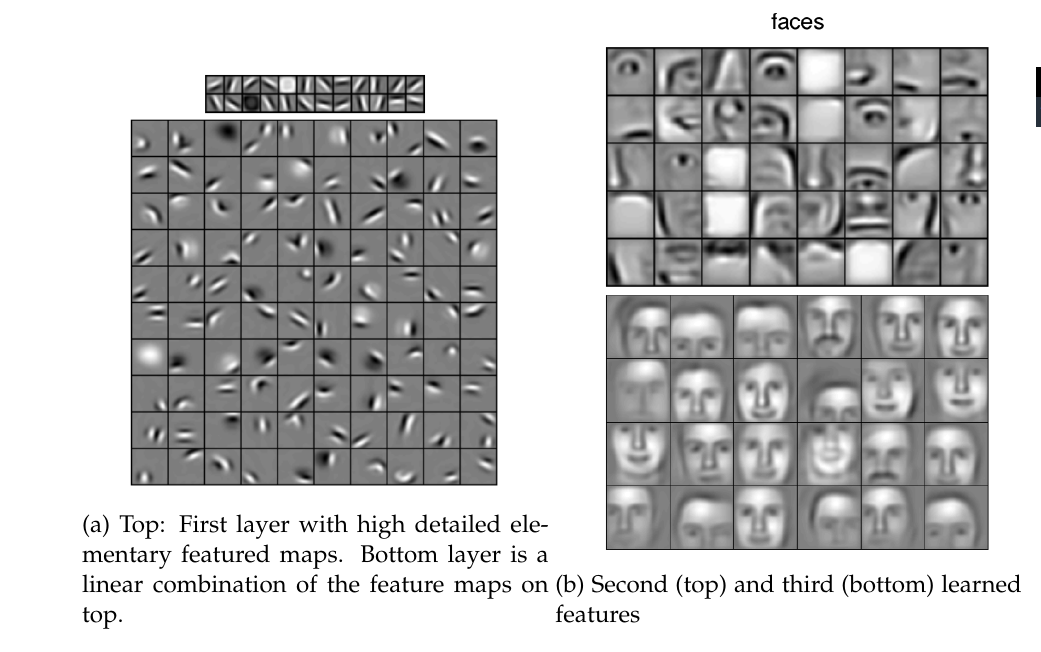

[convolutional deep belief-networks](https://www.cs.toronto.edu/~rgrosse/icml09-cdbn.pdf)  es el articulo de donde se trajo la Figura de arriba.

 proxima clase veremos los detalles de la Figura 5.3 y ejemplos de por lo menos una red CNN famosa (Lenet-5), y si el tiempo alcanza, la AlexNet.